In [364]:
pip install requests pandas nltk transformers

In [365]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [366]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [367]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [368]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [369]:
import requests
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from nltk import pos_tag
from nltk.stem import PorterStemmer

In [370]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import time

In [371]:
import pandas as pd

with open('events.txt', 'r', encoding='utf-8') as file:
    content = file.read()

print("File Content:")
print(content)

File Content:
1. The Tech Conference is happening on May 10, 2022, in San Francisco, CA, where experts discuss the future of AI.

2. Experience the vibrant Music Festival on June 15, 2024, in New Orleans, LA, featuring a lineup of popular bands.

3. Don't miss the thought-provoking Art Exhibition opening on July 20, 2001, in New York, NY, exploring works by contemporary artists.

4. The inspiring annual Charity Run takes place on August 5, 2015, in Chicago, IL, supporting local charities.

5. Join us at the delectable Food Fair on September 12, 2019, in Austin, TX, celebrating local culinary talent.

6. Literary enthusiasts gather at the Annual Book Fair on October 1, 2018, in Los Angeles, CA, celebrating literature and authors.

7. The enchanting Winter Wonderland Festival begins on December 1, 2023, in Denver, CO, filled with holiday cheer.

8. Innovative entrepreneurs showcase their ideas at the Global Startup Summit on November 10, 2016, in Singapore.

9. Join the magical Summer So

In [372]:
# Split the content into lines
lines = content.split('\n')

# Create a DataFrame from the lines
df = pd.DataFrame(lines, columns=['text'])

# Initialize stop words and stemmer for English
stop_words_en = set(stopwords.words('english'))
stemmer_en = PorterStemmer()

# Preprocess text
def preprocess(text):
    # Normalization: Convert to lowercase
    text = text.lower()
    # Remove special characters and extra whitespace
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words_en]

    return ' '.join(tokens)

# Apply preprocessing to the text
df['text'] = df['text'].apply(preprocess)
print(df['text'].head(10))

0    1 tech conference happening may 10 2022 san fr...
1                                                     
2    2 experience vibrant music festival june 15 20...
3                                                     
4    3 dont miss thoughtprovoking art exhibition op...
5                                                     
6    4 inspiring annual charity run takes place aug...
7                                                     
8    5 join us delectable food fair september 12 20...
9                                                     
Name: text, dtype: object


In [373]:
import spacy
import pandas as pd

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

In [374]:
# Function for Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    entities = {ent.label_: ent.text for ent in doc.ents}
    return entities

# Apply NER to the DataFrame
df['entities'] = df['text'].apply(extract_entities)

# Part-of-Speech (POS) Tagging
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

# Apply POS tagging to the DataFrame
df['pos_tags'] = df['text'].apply(pos_tagging)

# Display the DataFrame with extracted features
print("DataFrame with Extracted Features:")
print(df[['text']])
print(df[['entities']])
print(df[['pos_tags']])

DataFrame with Extracted Features:
                                                  text
0    1 tech conference happening may 10 2022 san fr...
1                                                     
2    2 experience vibrant music festival june 15 20...
3                                                     
4    3 dont miss thoughtprovoking art exhibition op...
5                                                     
6    4 inspiring annual charity run takes place aug...
7                                                     
8    5 join us delectable food fair september 12 20...
9                                                     
10   6 literary enthusiasts gather annual book fair...
11                                                    
12   7 enchanting winter wonderland festival begins...
13                                                    
14   8 innovative entrepreneurs showcase ideas glob...
15                                                    
16   9 join magical summer sol

In [375]:
def extract_relationships(text):
    doc = nlp(text)
    relationships = []
    for token in doc:
        if token.dep_ == 'nsubj':
            relationships.append((token.text, token.head.text))
    return relationships

df['relationships'] = df['text'].apply(extract_relationships)

In [376]:
from textblob import TextBlob

def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['text'].apply(sentiment_analysis)
print(df['sentiment'])

0      0.000000
1      0.000000
2      0.301010
3      0.000000
4      0.151515
5      0.000000
6      0.250000
7      0.000000
8      0.233333
9      0.000000
10     0.400000
11     0.000000
12     0.400000
13     0.000000
14     0.250000
15     0.000000
16     0.250000
17     0.000000
18     0.500000
19     0.000000
20     0.500000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
30     0.000000
31     0.000000
32     0.100000
33     0.000000
34     0.450000
35     0.000000
36     0.136364
37     0.000000
38     0.000000
39     0.000000
40     0.700000
41     0.000000
42     0.000000
43     0.000000
44     0.000000
45     0.000000
46     0.000000
47     0.000000
48     0.000000
49     0.000000
50     0.700000
51     0.000000
52     0.166667
53     0.000000
54     0.537500
55     0.000000
56     0.300000
57     0.000000
58     0.062121
59     0.000000
60     0.000000
61     0.000000
62     0

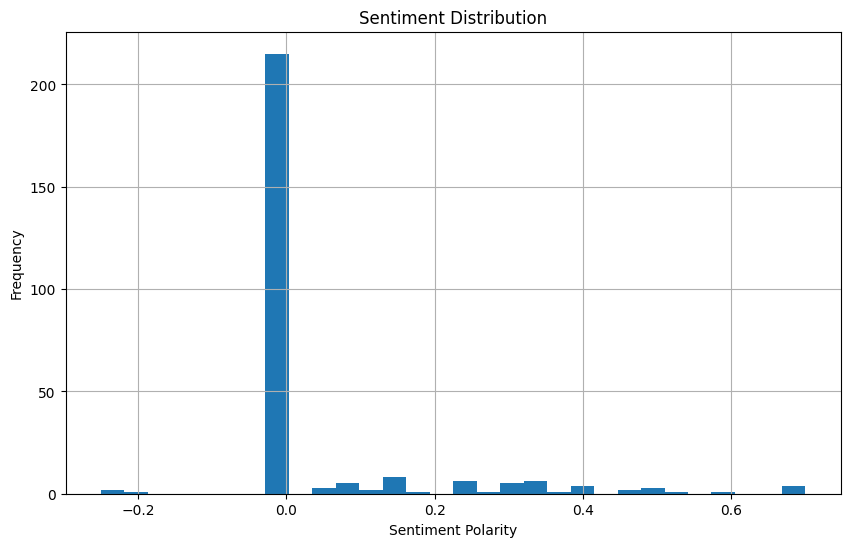

In [377]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [378]:
df.to_csv('enriched_data.csv', index=False)

In [379]:
df

,text,entities,pos_tags,relationships,sentiment
0,1 tech conference happening may 10 2022 san fr...,"{'CARDINAL': '1', 'DATE': '10 2022'}","[(1, NUM), (tech, NOUN), (conference, NOUN), (...","[(experts, discuss)]",0.000000
1,,{},[],[],0.000000
2,2 experience vibrant music festival june 15 20...,"{'CARDINAL': '2', 'DATE': 'june 15 2024', 'GPE...","[(2, NUM), (experience, NOUN), (vibrant, ADJ),...",[],0.301010
3,,{},[],[],0.000000
4,3 dont miss thoughtprovoking art exhibition op...,"{'CARDINAL': '3', 'DATE': 'july 20 2001', 'GPE...","[(3, NUM), (do, AUX), (nt, PART), (miss, VERB)...","[(3, miss)]",0.151515
5,,{},[],[],0.000000
6,4 inspiring annual charity run takes place aug...,"{'CARDINAL': '4', 'DATE': 'august 5 2015', 'GP...","[(4, NUM), (inspiring, VERB), (annual, ADJ), (...","[(run, takes)]",0.250000
7,,{},[],[],0.000000
8,5 join us delectable food fair september 12 20...,"{'CARDINAL': '5', 'DATE': 'september 12 2019'}","[(5, NUM), (join, VERB), (us, PRON), (delectab...","[(5, join), (tx, celebrating)]",0.233333
9,,{},[],[],0.000000


In [380]:
def extract_event_info(text):
    # Extract event name pattern (improved to catch more event names)
    event_pattern = r'(?:at |the |for )?([^,]+?)(?=\s+(?:on|from)\s+\w+\s+\d{1,2})'

    # Date patterns
    date_pattern = r'(?:on |from )(\w+ \d{1,2}(?:-\d{1,2})?, \d{4})'

    # Location pattern
    location_pattern = r',\s+in\s+([^,]+(?:, [A-Z]{2})?)'

    # Extract information
    event_match = re.search(event_pattern, text)
    date_match = re.search(date_pattern, text)
    location_match = re.search(location_pattern, text)

    # Get matches or None
    event = event_match.group(1).strip() if event_match else None
    date = date_match.group(1) if date_match else None
    location = location_match.group(1) if location_match else None

    # Convert date to datetime if found
    if date:
        try:
            # Handle date ranges
            if '-' in date:
                date = date.split('-')[0].strip()
            date = pd.to_datetime(date)
        except:
            date = None

    return pd.Series({
        'event_name': event,
        'date': date,
        'location': location
    })

# Assuming 'content' from the earlier cell contains the raw text
events = [line.strip() for line in content.split('\n') if line.strip()]  # Use 'content' instead of 'text_content'
df = pd.DataFrame({'text': events})

# Extract information
df[['event_name', 'date', 'location']] = df['text'].apply(extract_event_info)

In [381]:
df

,text,event_name,date,location
0,"1. The Tech Conference is happening on May 10,...",1. The Tech Conference is happening,2022-05-10,"San Francisco, CA"
1,2. Experience the vibrant Music Festival on Ju...,2. Experience the vibrant Music Festival,2024-06-15,"New Orleans, LA"
2,3. Don't miss the thought-provoking Art Exhibi...,3. Don't miss the thought-provoking Art Exhibi...,2001-07-20,"New York, NY"
3,4. The inspiring annual Charity Run takes plac...,4. The inspiring annual Charity Run takes place,2015-08-05,"Chicago, IL"
4,5. Join us at the delectable Food Fair on Sept...,5. Join us at the delectable Food Fair,2019-09-12,"Austin, TX"
5,6. Literary enthusiasts gather at the Annual B...,6. Literary enthusiasts gather at the Annual B...,2018-10-01,"Los Angeles, CA"
6,7. The enchanting Winter Wonderland Festival b...,7. The enchanting Winter Wonderland Festival b...,2023-12-01,"Denver, CO"
7,8. Innovative entrepreneurs showcase their ide...,8. Innovative entrepreneurs showcase their ide...,2016-11-10,Singapore.
8,9. Join the magical Summer Solstice celebratio...,9. Join the magical Summer Solstice celebration,2021-06-21,"Stonehenge, UK"
9,10. The cutting-edge Science and Technology Ex...,10. The cutting-edge Science and Technology Ex...,2017-04-15,"Boston, MA"


In [382]:
def preprocess_data(self, df):
        # Create month and year features
        df['month'] = df['date'].dt.month
        df['year'] = df['date'].dt.year
        df['day_of_week'] = df['date'].dt.dayofweek

        # Extract city and state/country
        df[['city', 'state']] = df['location'].str.extract(r'(.*?)(?:,\s*([A-Z]{2}|[A-Za-z]+))?$')

        # Create event type feature
        df['event_type'] = df['event_name'].apply(self._categorize_event)

        return df

In [383]:
df

,text,event_name,date,location
0,"1. The Tech Conference is happening on May 10,...",1. The Tech Conference is happening,2022-05-10,"San Francisco, CA"
1,2. Experience the vibrant Music Festival on Ju...,2. Experience the vibrant Music Festival,2024-06-15,"New Orleans, LA"
2,3. Don't miss the thought-provoking Art Exhibi...,3. Don't miss the thought-provoking Art Exhibi...,2001-07-20,"New York, NY"
3,4. The inspiring annual Charity Run takes plac...,4. The inspiring annual Charity Run takes place,2015-08-05,"Chicago, IL"
4,5. Join us at the delectable Food Fair on Sept...,5. Join us at the delectable Food Fair,2019-09-12,"Austin, TX"
5,6. Literary enthusiasts gather at the Annual B...,6. Literary enthusiasts gather at the Annual B...,2018-10-01,"Los Angeles, CA"
6,7. The enchanting Winter Wonderland Festival b...,7. The enchanting Winter Wonderland Festival b...,2023-12-01,"Denver, CO"
7,8. Innovative entrepreneurs showcase their ide...,8. Innovative entrepreneurs showcase their ide...,2016-11-10,Singapore.
8,9. Join the magical Summer Solstice celebratio...,9. Join the magical Summer Solstice celebration,2021-06-21,"Stonehenge, UK"
9,10. The cutting-edge Science and Technology Ex...,10. The cutting-edge Science and Technology Ex...,2017-04-15,"Boston, MA"


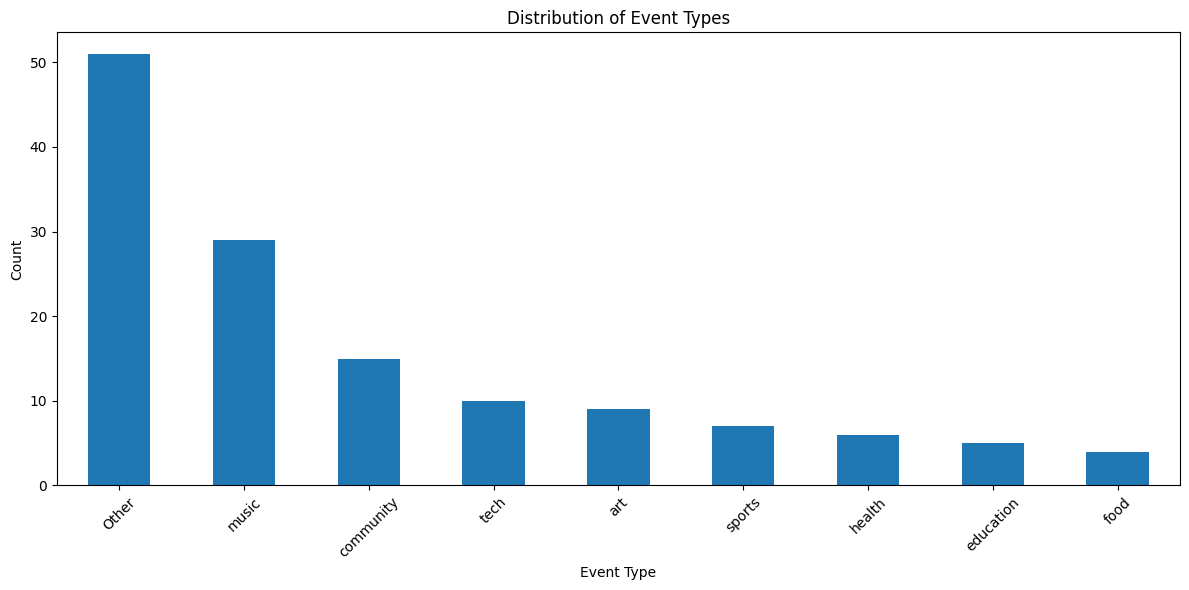

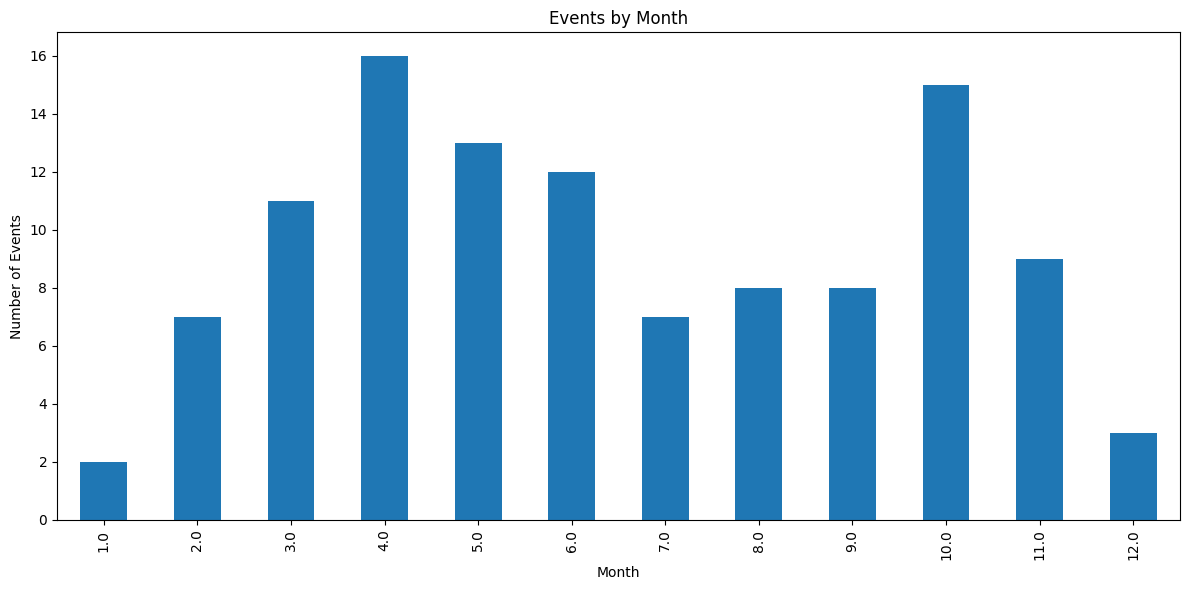

In [384]:
# Create features
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek
df['event_type'] = df['event_name'].apply(categorize_event)
df[['city', 'state']] = df['location'].str.extract(r'(.*?)(?:,\s*([A-Z]{2}|[A-Za-z]+))?$')

# Visualize event distribution
plt.figure(figsize=(12, 6))
df['event_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize events by month
plt.figure(figsize=(12, 6))
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Events by Month')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

In [385]:
# Prepare data for modeling
# Encode categorical variables
le_city = LabelEncoder()
le_state = LabelEncoder()
le_event_type = LabelEncoder()

df['city_encoded'] = le_city.fit_transform(df['city'].fillna('Unknown'))
df['state_encoded'] = le_state.fit_transform(df['state'].fillna('Unknown'))
df['event_type_encoded'] = le_event_type.fit_transform(df['event_type'])


In [386]:
# Prepare features
feature_cols = ['month', 'year', 'day_of_week', 'city_encoded', 'state_encoded']
X = df[feature_cols].values
y = df['event_type_encoded']

In [387]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Get unique labels in y_test
unique_labels = sorted(set(y_test))

# Filter target names to match unique labels
target_names = [le_event_type.classes_[label] for label in unique_labels]

# Print classification report using filtered target names
print("\nModel Performance:")
print(classification_report(y_test, y_pred,
                          target_names=target_names)) # Change to filtered target names


Model Performance:
              precision    recall  f1-score   support

       Other       0.25      0.67      0.36         6
         art       0.00      0.00      0.00         3
   community       0.00      0.00      0.00         3
        food       0.00      0.00      0.00         1
      health       1.00      0.33      0.50         3
       music       0.25      0.25      0.25         8
      sports       0.00      0.00      0.00         2
        tech       0.00      0.00      0.00         2

    accuracy                           0.25        28
   macro avg       0.19      0.16      0.14        28
weighted avg       0.23      0.25      0.20        28



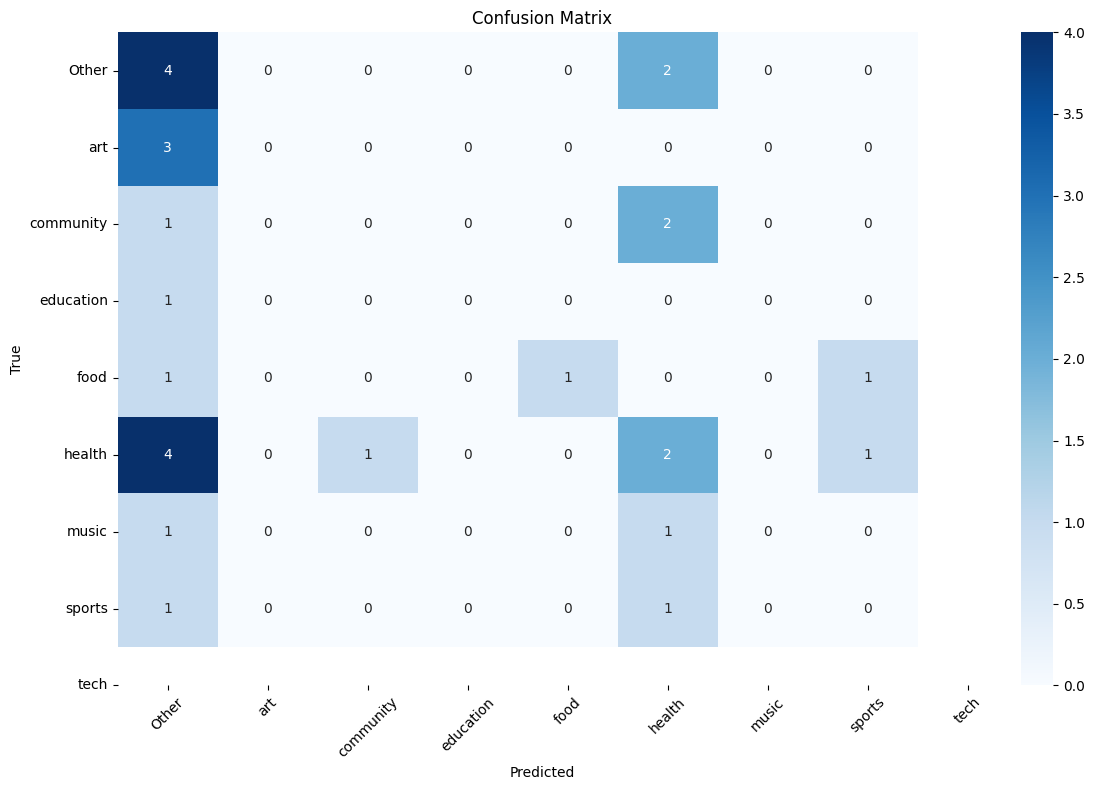

In [388]:
# Plot confusion matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_event_type.classes_,
            yticklabels=le_event_type.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

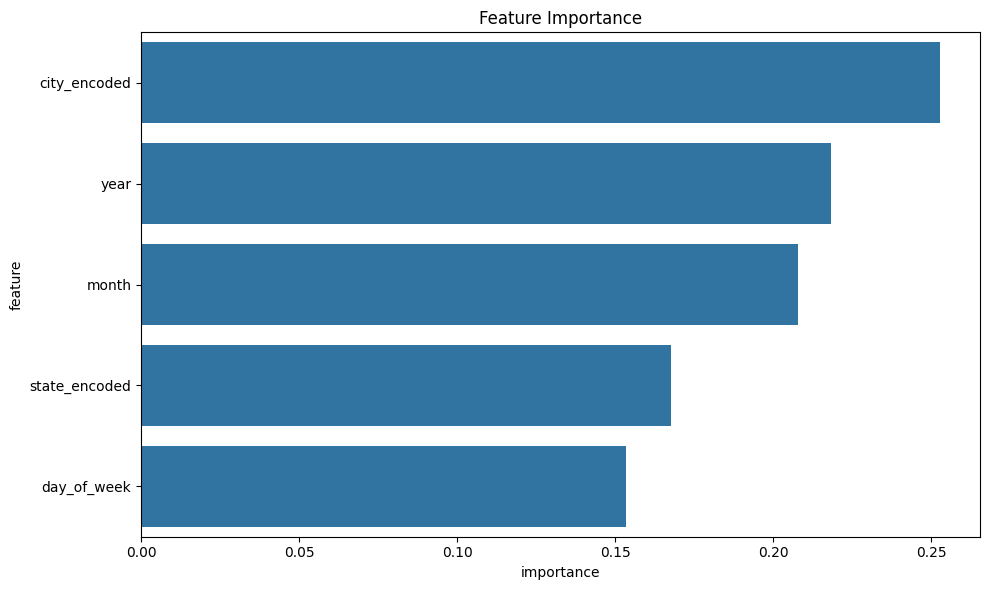

In [389]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [417]:
!pip install geonamescache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 38.4 MB/s eta 0:00:00


In [420]:
def predict_event_details(text):
    # Improved versatile patterns
    event_pattern = r'^(.*?)(?=\s+(?:on|at|in|from)|$)'

    # Enhanced date pattern to catch various formats including those with commas
    date_pattern = r'(?:on\s+)?(\d{1,2}(?:st|nd|rd|th)?\s*[,]?\s*(?:January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[,]?\s+\d{4})'

    # Enhanced location pattern to catch city, state/country format
    location_pattern = r'(?:in|at|,)\s+([^,]+(?:,\s*[A-Z]{2}|,\s*[A-Za-z\s]+)?)\s*$'

    # Import cities database (you can use geonamescache or a similar library)
    from geonamescache import GeonamesCache
    gc = GeonamesCache()
    cities = gc.get_cities()

    def validate_location(loc):
        if not loc:
            return None
        # Clean the location string
        loc_parts = loc.strip().split(',')
        city = loc_parts[0].strip()
        state = loc_parts[1].strip() if len(loc_parts) > 1 else None

        # Check if it's a valid city
        for city_data in cities.values():
            if city.lower() == city_data['name'].lower():
                return f"{city_data['name']}, {city_data['countryCode']}"

        # If not found, return original but mark as unverified
        return loc + " (Unverified)"

    # Extract event name
    event_match = re.search(event_pattern, text, re.IGNORECASE)
    event_name = event_match.group(1).strip() if event_match else None

    # Extract and validate date
    date_match = re.search(date_pattern, text, re.IGNORECASE)
    event_date = date_match.group(1) if date_match else None
    if event_date:
        try:
            # Handle multiple date formats
            date_text = re.sub(r'(?:st|nd|rd|th)', '', event_date)  # Remove ordinal indicators
            parsed_date = pd.to_datetime(date_text)
            event_date = parsed_date.strftime('%B %d, %Y')  # Format: March 10, 2021
        except:
            event_date = None

    # Extract and validate location
    location_match = re.search(location_pattern, text, re.IGNORECASE)
    location = location_match.group(1).strip() if location_match else None
    if location:
        location = validate_location(location)

    return event_name, event_date, location

In [421]:
test_event = "Tech Gala on 5 December 2023 at Bahria University"
category, date, location = predict_event_details(test_event)
print(f"Category: {category}")
print(f"Date: {date}")
print(f"Location: {location}")

Category: Tech Gala
Date: December 05, 2023
Location: Bahria University (Unverified)


In [392]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [393]:
import pickle
model_path = '/content/drive/MyDrive/event_classifier_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump({
        'model': rf_model,
        'le_city': le_city,
        'le_state': le_state,
        'le_event_type': le_event_type
    }, f)

print("\nModel saved to Google Drive!")


Model saved to Google Drive!


In [408]:
model_path = '/content/drive/MyDrive/event_classifier_model.pkl'

with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Access the loaded model components
rf_model = loaded_model['model']
le_city = loaded_model['le_city']
le_state = loaded_model['le_state']
le_event_type = loaded_model['le_event_type']

print("Model loaded successfully!")

Model loaded successfully!


In [395]:
!pip install ipywidgets
from IPython.display import HTML, display
import ipywidgets as widgets
from IPython.display import clear_output

In [422]:
def create_animated_event_predictor():
    # Enhanced CSS with animations and better styling
    display(HTML("""
    <style>
        @keyframes fadeInDown {
            from {
                opacity: 0;
                transform: translateY(-20px);
            }
            to {
                opacity: 1;
                transform: translateY(0);
            }
        }

        @keyframes pulseBox {
            0% { transform: scale(1); }
            50% { transform: scale(1.02); }
            100% { transform: scale(1); }
        }

        @keyframes gradientBG {
            0% { background-position: 0% 50%; }
            50% { background-position: 100% 50%; }
            100% { background-position: 0% 50%; }
        }

        .main-container {
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            padding: 20px;
            max-width: 900px;
            margin: 20px auto;
            background: linear-gradient(120deg, #f6f8f9, #ffffff, #f0f2f3);
            background-size: 200% 200%;
            animation: gradientBG 10s ease infinite;
            border-radius: 15px;
            box-shadow: 0 8px 32px rgba(0,0,0,0.1);
        }

        .title-box {
            background: linear-gradient(45deg, #2c3e50, #3498db, #2980b9);
            background-size: 200% 200%;
            animation: gradientBG 5s ease infinite;
            padding: 20px 40px;
            border-radius: 10px;
            margin-bottom: 30px;
            box-shadow: 0 4px 15px rgba(0,0,0,0.2);
            transform-origin: center;
            animation: fadeInDown 1s ease-out, pulseBox 3s infinite;
        }

        .main-title {
            color: white;
            font-size: 36px;
            font-weight: bold;
            text-align: center;
            text-shadow: 2px 2px 4px rgba(0,0,0,0.3);
            margin: 0;
            font-family: 'Arial', sans-serif;
        }

        .input-section {
            width: 100%;
            max-width: 700px;
            animation: fadeInDown 1s ease-out 0.3s backwards;
        }

        .prediction-result {
            background: white;
            border-left: 5px solid #3498db;
            padding: 15px;
            margin: 10px 0;
            border-radius: 8px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
            animation: fadeInDown 0.5s ease-out;
            transition: transform 0.3s ease;
        }

        .prediction-result:hover {
            transform: translateX(10px);
        }

        .result-label {
            color: #7f8c8d;
            font-size: 14px;
            margin-bottom: 5px;
            font-weight: 500;
        }

        .result-value {
            color: #2c3e50;
            font-size: 16px;
            font-weight: bold;
        }

        .button-container {
            display: flex;
            gap: 15px;
            margin: 20px 0;
            animation: fadeInDown 1s ease-out 0.6s backwards;
        }
    </style>

    <div class="main-container">
        <div class="title-box">
            <h1 class="main-title">🎯 Event Predictor AI</h1>
        </div>
    """))

    # Create input widget
    input_text = widgets.Text(
        placeholder='E.g., "Tech Innovation Summit on December 15, 2024, in Austin, TX"',
        description='',
        layout=widgets.Layout(width='700px')
    )

    # Create buttons with icons
    predict_button = widgets.Button(
        description='Predict Event',
        button_style='primary',
        icon='magic',
        layout=widgets.Layout(width='200px')
    )

    clear_button = widgets.Button(
        description='Clear Input',
        button_style='warning',
        icon='trash',
        layout=widgets.Layout(width='200px')
    )

    output = widgets.Output()

    def on_predict_button_clicked(b):
        with output:
            clear_output()

            # Loading animation
            display(HTML("""
                <div style="text-align: center; margin: 20px;">
                    <div style="color: #3498db; font-size: 18px;">
                        Analyzing event details... 🔍
                    </div>
                </div>
            """))
            time.sleep(1)

            text = input_text.value
            predicted_category, predicted_date, predicted_location = predict_event_details(text)

            clear_output()
            display(HTML(f"""
            <div class="results-container">
                <div class="prediction-result">
                    <div class="result-label">📝 Input Event</div>
                    <div class="result-value">{text}</div>
                </div>

                <div class="prediction-result">
                    <div class="result-label">🏷️ Category</div>
                    <div class="result-value">{predicted_category}</div>
                </div>

                <div class="prediction-result">
                    <div class="result-label">📅 Date</div>
                    <div class="result-value">{predicted_date}</div>
                </div>

                <div class="prediction-result">
                    <div class="result-label">📍 Location</div>
                    <div class="result-value">{predicted_location}</div>
                </div>
            </div>
            """))

    def on_clear_button_clicked(b):
        input_text.value = ''
        with output:
            clear_output()

    predict_button.on_click(on_predict_button_clicked)
    clear_button.on_click(on_clear_button_clicked)

    # Display the rest of the UI
    display(HTML('<div class="input-section">'))
    display(input_text)
    display(HTML('</div>'))

    # Button container
    button_container = widgets.HBox([predict_button, clear_button])
    display(HTML('<div class="button-container">'))
    display(button_container)
    display(HTML('</div>'))

    display(output)
    display(HTML('</div>'))  # Close main-container

# Create the UI
create_animated_event_predictor()

Text(value='', layout=Layout(width='700px'), placeholder='E.g., "Tech Innovation Summit on December 15, 2024, …

Output()